<a href="https://colab.research.google.com/github/laveesha/Research-Flood_Prediction_and_Dry_Ration_Optimization_based_on_Kelani_River_Basin/blob/Dilini-IT16073838/DHARA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Based from the tutorial of Jason Brownlee on Recurrent Neural Networks
%matplotlib inline

from __future__ import print_function

import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"


import numpy as np
import matplotlib.pyplot as plt
import pandas
import math


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

plt.style.use('ggplot')

Using TensorFlow backend.


In [0]:
np.random.seed(10)

In [3]:
#Use the flood_data.csv dataset
from google.colab import files
uploaded = files.upload()
dataframe = pandas.read_csv('flood_train.csv', usecols=[1], engine='python', skipfooter=3)
dataset   = dataframe.values
dataset   = dataset.astype('float32')
dataframe.head()

Saving flood_train.csv to flood_train.csv


,waterlevel
0,0.27
1,0.26
2,0.27
3,0.28
4,0.28


In [0]:
plt.plot(dataset)

In [0]:
# normalize the dataset
from sklearn import preprocessing

In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
dataset= min_max_scaler.fit_transform(dataset)

In [13]:
dataset

array([[0.04770318],
       [0.04593639],
       [0.04770318],
       ...,
       [0.10070671],
       [0.10070671],
       [0.09893993]], dtype=float32)

In [15]:
# split into train and test sets
train_size  = int(len(dataset) * 0.67)
test_size   = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

33710 16604


In [0]:
# This function creates a sliding window of the dataset.
def create_dataset(dataset, sliding_window=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-sliding_window-1):
        a = dataset[i:(i+sliding_window), 0]
        dataX.append(a)
        dataY.append(dataset[i + sliding_window, 0])
    return np.array(dataX), np.array(dataY)

In [0]:
# use a n-10 sliding window equivalent to 2.5 hours of historical data
slide_window   = 10
trainX, trainY = create_dataset(train, slide_window)
testX, testY   = create_dataset(test, slide_window)

In [0]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX  = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [34]:
print(trainX.shape)

(33699, 1, 10)


In [22]:
#Setup the LSTM

model = Sequential()
model.add(LSTM(4, input_dim=slide_window))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=50, batch_size=1, verbose=2)

W0621 11:49:27.681007 140539923826560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 10))`
  This is separate from the ipykernel package so we can avoid doing imports until
W0621 11:49:27.708767 140539923826560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0621 11:49:2

Epoch 1/50
 - 65s - loss: 1.9714e-04
Epoch 2/50
 - 64s - loss: 1.2748e-04
Epoch 3/50
 - 64s - loss: 1.1673e-04
Epoch 4/50
 - 63s - loss: 1.0960e-04
Epoch 5/50
 - 64s - loss: 1.0738e-04
Epoch 6/50
 - 64s - loss: 1.0665e-04
Epoch 7/50
 - 64s - loss: 1.0471e-04
Epoch 8/50
 - 63s - loss: 1.0410e-04
Epoch 9/50
 - 63s - loss: 1.0056e-04
Epoch 10/50
 - 65s - loss: 1.0213e-04
Epoch 11/50
 - 66s - loss: 1.0031e-04
Epoch 12/50
 - 65s - loss: 1.0120e-04
Epoch 13/50
 - 65s - loss: 1.0231e-04
Epoch 14/50
 - 64s - loss: 9.8231e-05
Epoch 15/50
 - 65s - loss: 1.0051e-04
Epoch 16/50
 - 64s - loss: 9.9033e-05
Epoch 17/50
 - 63s - loss: 1.0191e-04
Epoch 18/50
 - 64s - loss: 1.0021e-04
Epoch 19/50
 - 64s - loss: 9.9795e-05
Epoch 20/50
 - 62s - loss: 1.0110e-04
Epoch 21/50
 - 63s - loss: 9.9190e-05
Epoch 22/50
 - 62s - loss: 1.0067e-04
Epoch 23/50
 - 63s - loss: 9.7373e-05
Epoch 24/50
 - 63s - loss: 1.0178e-04
Epoch 25/50
 - 63s - loss: 9.9939e-05
Epoch 26/50
 - 63s - loss: 1.0536e-04
Epoch 27/50
 - 64s - 

In [23]:
# Print out the evaluation for both the
trainScore = model.evaluate(trainX, trainY, verbose=0)
trainScore = math.sqrt(trainScore)
trainScore = scaler.inverse_transform(np.array([[trainScore]]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = model.evaluate(testX, testY, verbose=0)
testScore = math.sqrt(testScore)
testScore = scaler.inverse_transform(np.array([[testScore]]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 0.00 RMSE


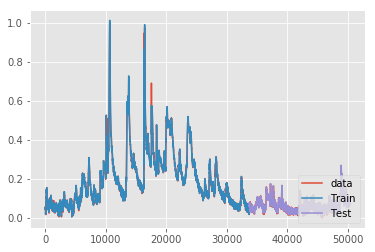

In [27]:
trainPredict = model.predict(trainX)
testPredict  = model.predict(testX)
 
# shift train predictions for plotting
trainPredictPlot       = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[slide_window:len(trainPredict)+slide_window, :] = trainPredict
 
# shift test predictions for plotting
testPredictPlot       = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(slide_window*2)+1:len(dataset)-1, :] = testPredict
 
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['data','Train', 'Test'], loc='lower right')
plt.show()

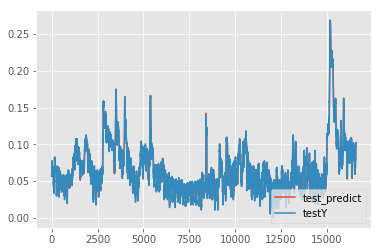

In [39]:
plt.plot(testPredict)
plt.plot(testY)
plt.legend(['test_predict','testY'], loc='lower right')
plt.show()

In [0]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]